# SYRIA-TEL CUSTOMER CHURN PREDICTION

# Project Overview:

Customer churn, or the termination of a customer's service, is a major problem for SyriaTel, a well-known telecommunications provider. This can result in lost revenue and decreased market competitiveness. This project intends to reveal predictive patterns and create workable strategies to keep customers and reduce revenue loss by utilizing data analysis and machine learning.


# Business Understanding
## Problem Statement

Customer attrition was a major problem for Syria Tel, a well-known telecom provider. Thus, clients are discontinuing their services with Syria Tel, which has an impact on the stability and revenue of the business. The challenge is anticipating when clients might depart and figuring out why they would like to. Syria Tel seeks to stop this from occurring and maintain client satisfaction.



### Main objective
The project's aim is to develop a classifier capable of accurately identifying customers likely to churn, enabling SyriaTel to implement effective churn prevention strategies. By reducing turnover and enhancing profitability, SyriaTel seeks to optimize its business performance. The primary objective is to leverage data analysis and machine learning to establish an efficient churn prediction system tailored to SyriaTel's needs.

#### Key objectives 

- Crafting precise machine learning models to predict customer attrition using historical data.
- Analyzing consumer behavior patterns and trends associated with churn.
- Utilizing feature engineering techniques to enhance churn prediction models.
- Evaluating model performance and adjusting hyperparameters for optimal accuracy.
- Providing actionable insights and recommendations to facilitate the implementation of successful customer retention strategies.
- Enhancing SyriaTel's understanding of customer behaviors influencing attrition to facilitate targeted retention efforts.
- Assessing the potential financial impact of reducing churn and improving retention rates for SyriaTel.

# DATA UNDERSTANDING


# DATA PREPARATION

In [1]:
#Import necessary libraries
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('bigml_churn_predictions.csv')
#first five rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#last five rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
# number of rows and column in the data
df.shape

(3333, 21)

In [5]:
#information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#Data statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Data cleaning

In [7]:
#checking for missing values in the dataframe
missing_values = df.isnull().sum()
print(missing_values)

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [8]:
# check for duplicate values
df.duplicated().sum()

0

Obsevation
- There are no duplicates or missing values in our dataset.

##### Feature Engineering

In [9]:
# Drop unnecessary columns as this may not be relevant for predicting churn
df.drop(columns=['phone number'], inplace=True)

In [10]:
# Label encoding for binary categorical variables to convert them to interger(1 or 0)
label_encoder = LabelEncoder()
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['churn'] = label_encoder.fit_transform(df['churn'])

##### From the feature engineering analysis above:
It appears that the phone number, will not play a significant role in the analysis since its private information, so it was dropped

Also converted the international plan, voice mail plan, and churn variables to numerical categorical via label encoder.

In [11]:
# Assuming df is your DataFrame
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Numerical features:")
print(numerical_features)

Numerical features:
['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


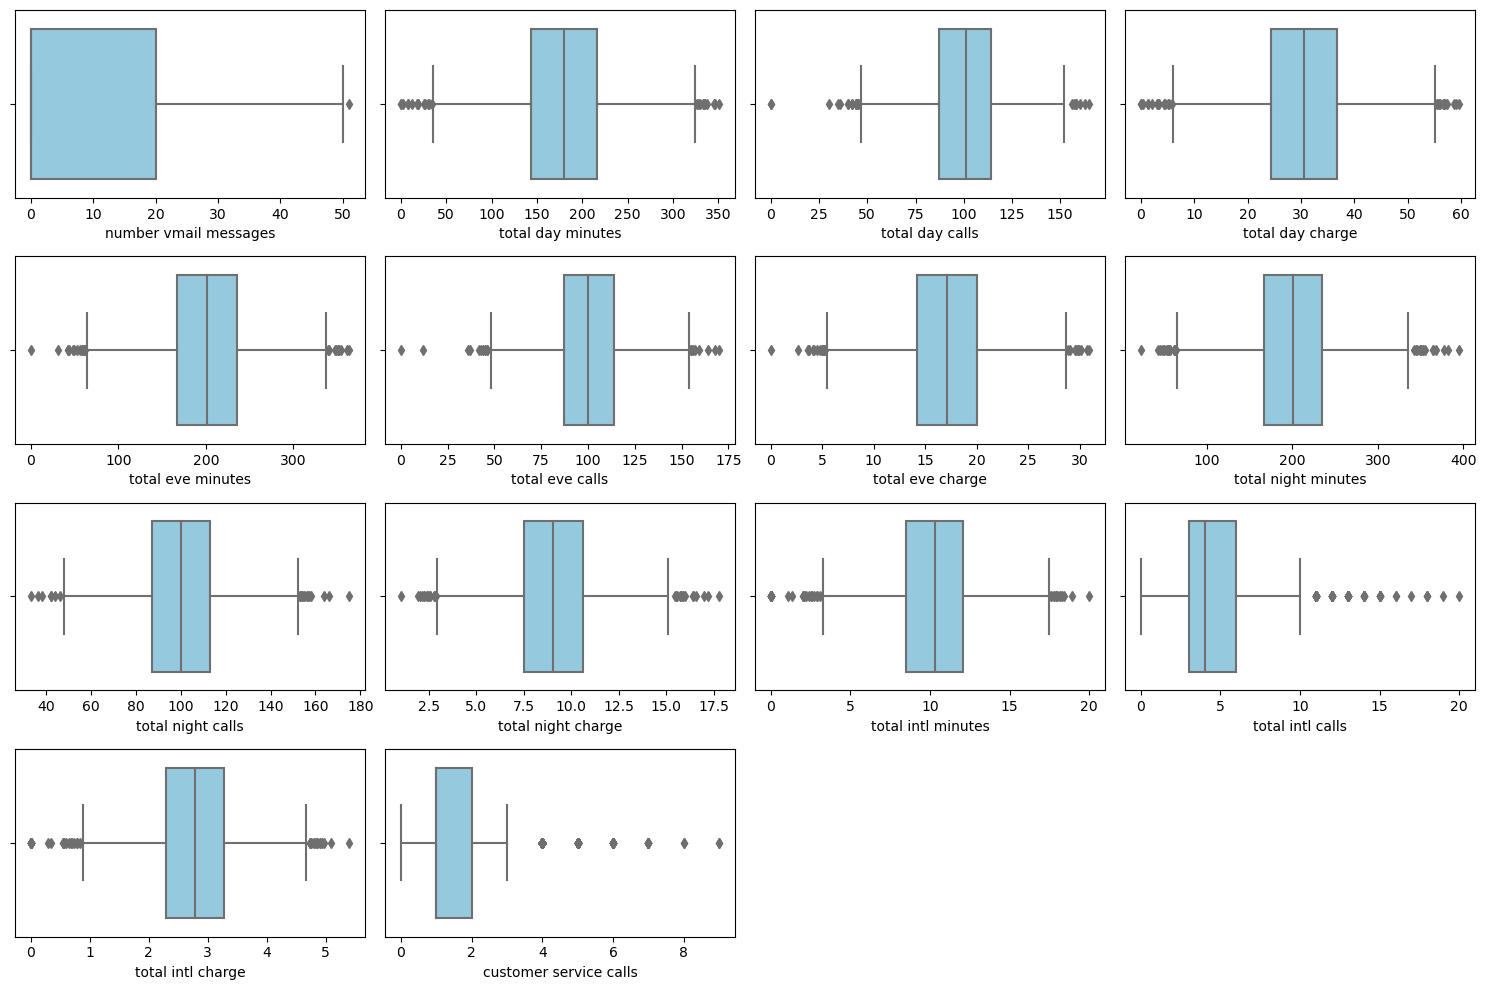

In [12]:
# Detecting outliers in numerical features
plt.figure(figsize=(15, 10)) 

# Plot box plots for numerical features
numerical_features = ['number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
                     'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes',
                     'total night calls', 'total night charge', 'total intl minutes', 'total intl calls',
                     'total intl charge', 'customer service calls']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [3]:
# Function to remove outliers based on IQR method
def remove_outliers_iqr(df, numerical_features, multiplier=1.5):
    cleaned_df = df.copy()
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        cleaned_df = cleaned_df[(cleaned_df[feature] >= lower_bound) & (cleaned_df[feature] <= upper_bound)]
    return cleaned_df

### Explanatory Data Analysis

####  - Distribution of churn

In [13]:
#inspect the dependent variable
df.groupby('churn').size()

churn
0    2850
1     483
dtype: int64

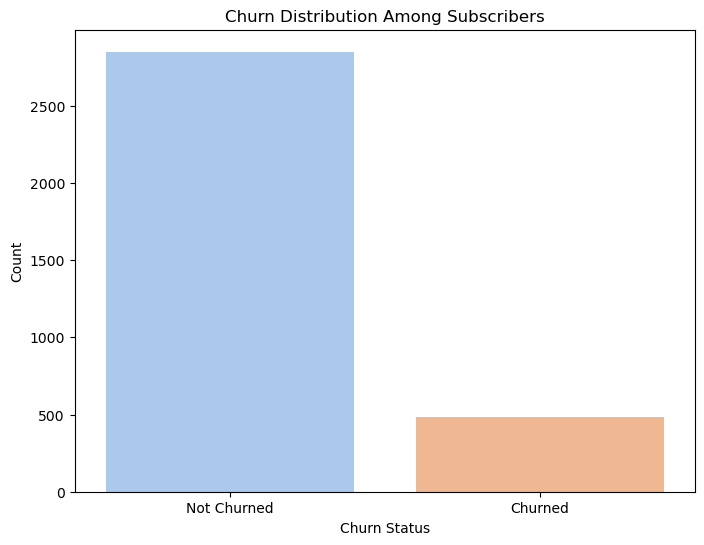

In [14]:
# Churn distribution among subscribers
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df, palette='pastel')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.title('Churn Distribution Among Subscribers')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

- This visualization depicts the count of subscribers categorized by churn status, revealing a notable proportion of customers who have terminated their service ("Churned"), underscoring potential challenges in revenue retention and customer retention efforts.

In [15]:
#calculate the percentage of churn
churn_rate = round(sum(df.churn) / len(df.churn) * 100, 2)

print('Churn Rate: {0}%'.format(churn_rate))

Churn Rate: 14.49%


- With a churn rate of 14.5%, SyriaTel's customer turnover is notably lower than the industry average of 21%, reflecting the effectiveness of its retention strategies compared to other telecommunications companies

#### Distribution of  account length

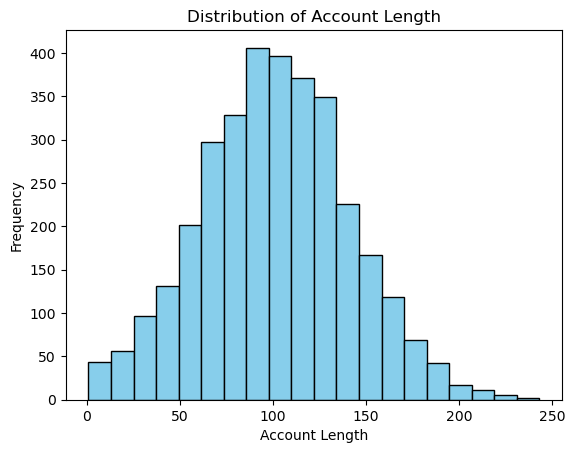

In [16]:
# Histogram for account length
plt.hist(df['account length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Account Length')
plt.ylabel('Frequency')
plt.title('Distribution of Account Length')
plt.show()

#### Churn distribution by international plan 

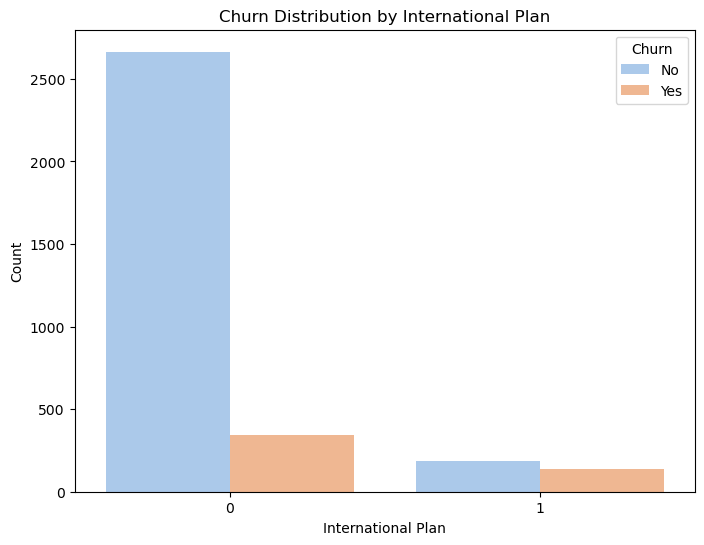

In [17]:
#Churn distribution by international plan
plt.figure(figsize=(8, 6))
sns.countplot(x='international plan', hue='churn', data=df, palette='pastel')
plt.title('Churn Distribution by International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

- This indicates a notably higher churn rate among customers with an international plan compared to those without, suggesting that having an international plan might contribute to a higher likelihood of churn.

#### Churn distribution by voice mail plan

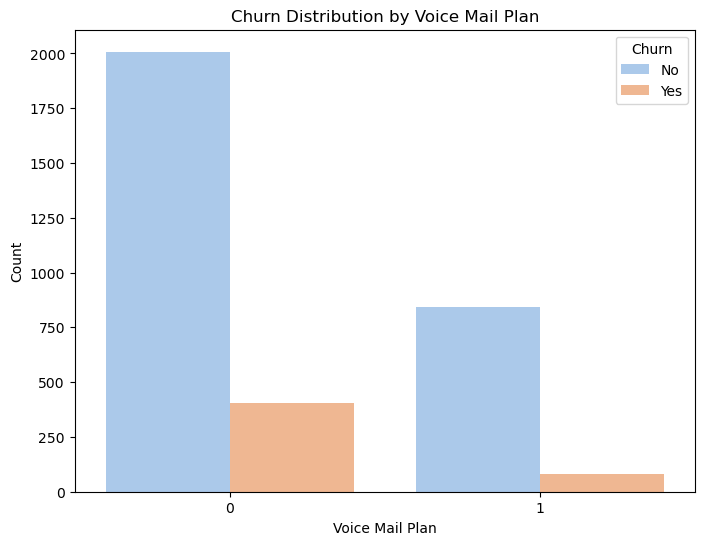

In [18]:
# Churn distribution by voice mail plan
plt.figure(figsize=(8, 6))
sns.countplot(x='voice mail plan', hue='churn', data=df, palette='pastel')
plt.title('Churn Distribution by Voice Mail Plan')
plt.xlabel('Voice Mail Plan')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.show()

- This suggests a slightly higher churn rate among customers with a voice mail plan compared to those without, indicating a potential but minor influence on churn behavior.

#### Distribution of customer service  calls

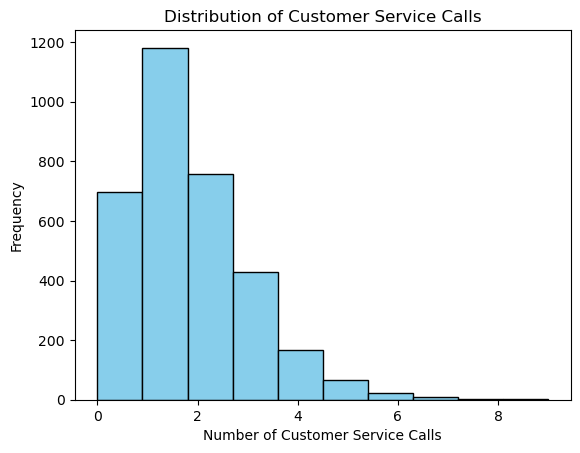

In [19]:
# Analysis of customer service calls
plt.hist(df['customer service calls'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Service Calls')
plt.show()

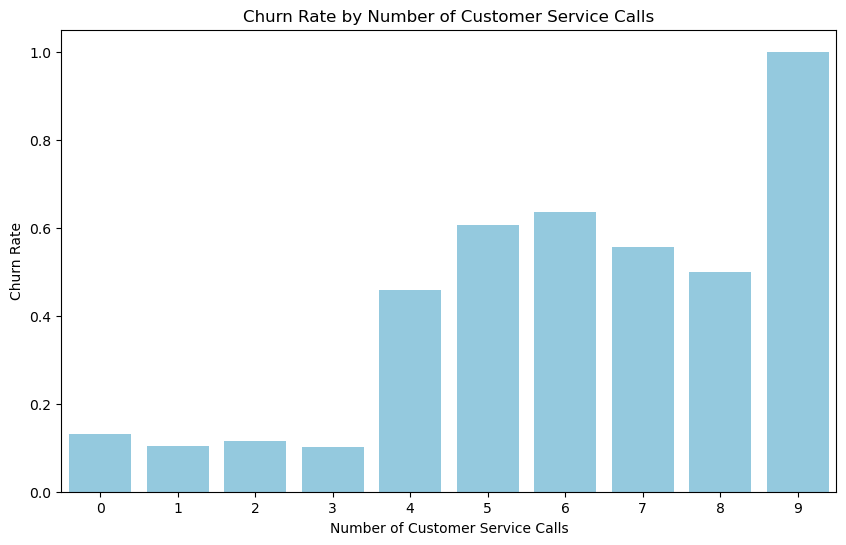

In [20]:
# Group data by number of customer service calls and calculate churn rate
churn_rate_by_calls = df.groupby('customer service calls')['churn'].mean()

# Plot churn rate by number of customer service calls
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_rate_by_calls.index, y=churn_rate_by_calls.values, color='skyblue')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Number of Customer Service Calls')
plt.show()

- The bar plot illustrates the relationship between the number of customer service calls and churn rate, indicating that higher churn rates are associated with increased customer service interactions.

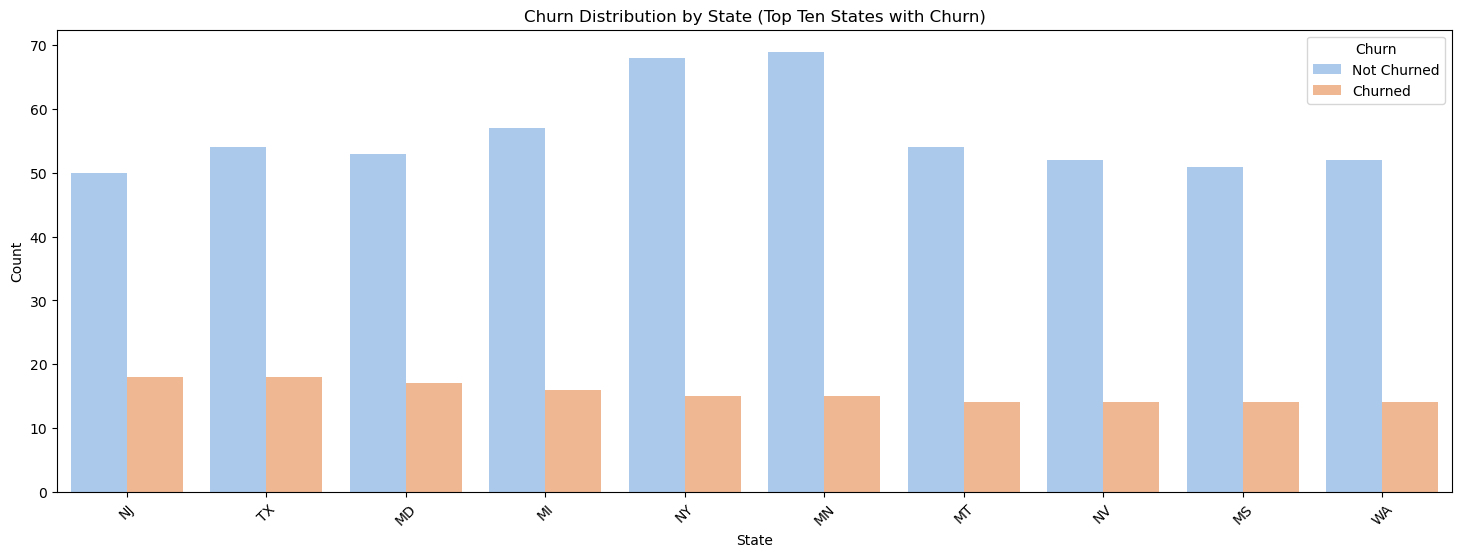

In [21]:
# Get top ten churned states
top_churn_states = df[df['churn'] == 1]['state'].value_counts().head(10).index

# Churn distribution by state (top ten states with churn)
plt.figure(figsize=(18, 6))
sns.countplot(x='state', hue='churn', data=df[df['state'].isin(top_churn_states)], order=top_churn_states, palette='pastel')
plt.title('Churn Distribution by State (Top Ten States with Churn)')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right', labels=['Not Churned', 'Churned'])
plt.xticks(rotation=45)
plt.show()


-It is evident that  NJ and TX have the highest rates of customer attrition, indicating a high likelihood of service provider switching for most of their clientele.

#### Removing outliers 

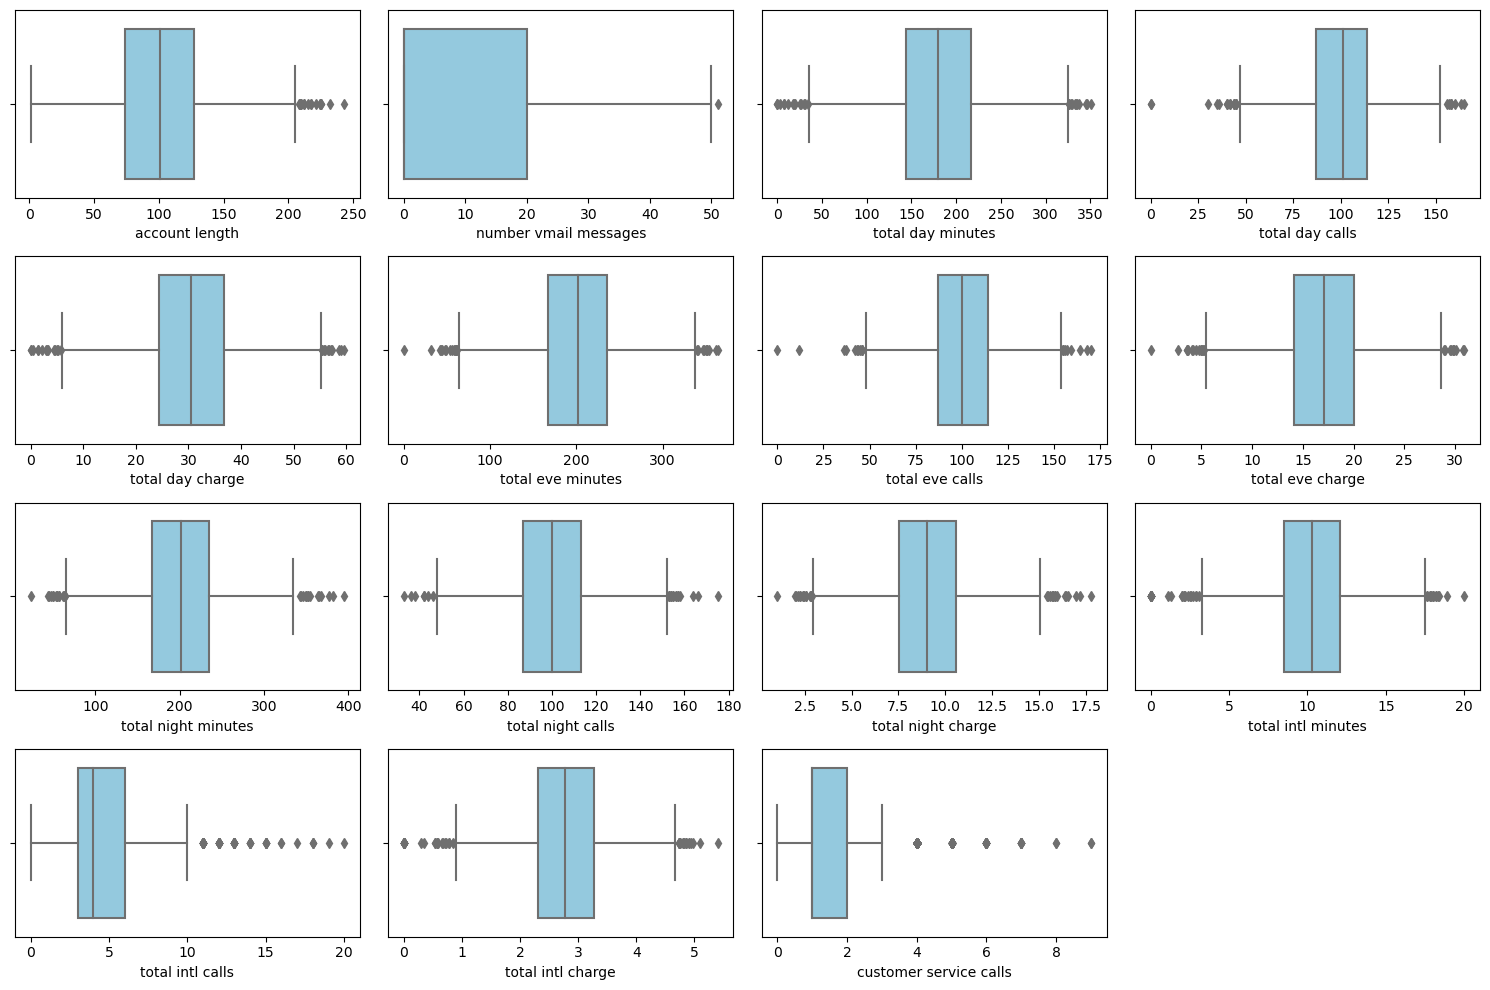

In [22]:
# Detecting outliers in numerical features
plt.figure(figsize=(15, 10))

# Plot box plots for numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls',
                      'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge',
                      'total night minutes', 'total night calls', 'total night charge', 'total intl minutes',
                      'total intl calls', 'total intl charge', 'customer service calls']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

- The outliers will be kept because they were essential for training the model.

In [22]:
# Drop the 'state' column
df.drop(columns=['state'], inplace=True)

In [23]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Sort correlation values with respect to 'churn'
correlation_with_churn = corr_matrix['churn'].sort_values(ascending=False)

print("Attributes with the highest correlation with 'churn':")
print(correlation_with_churn)

Attributes with the highest correlation with 'churn':
churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64


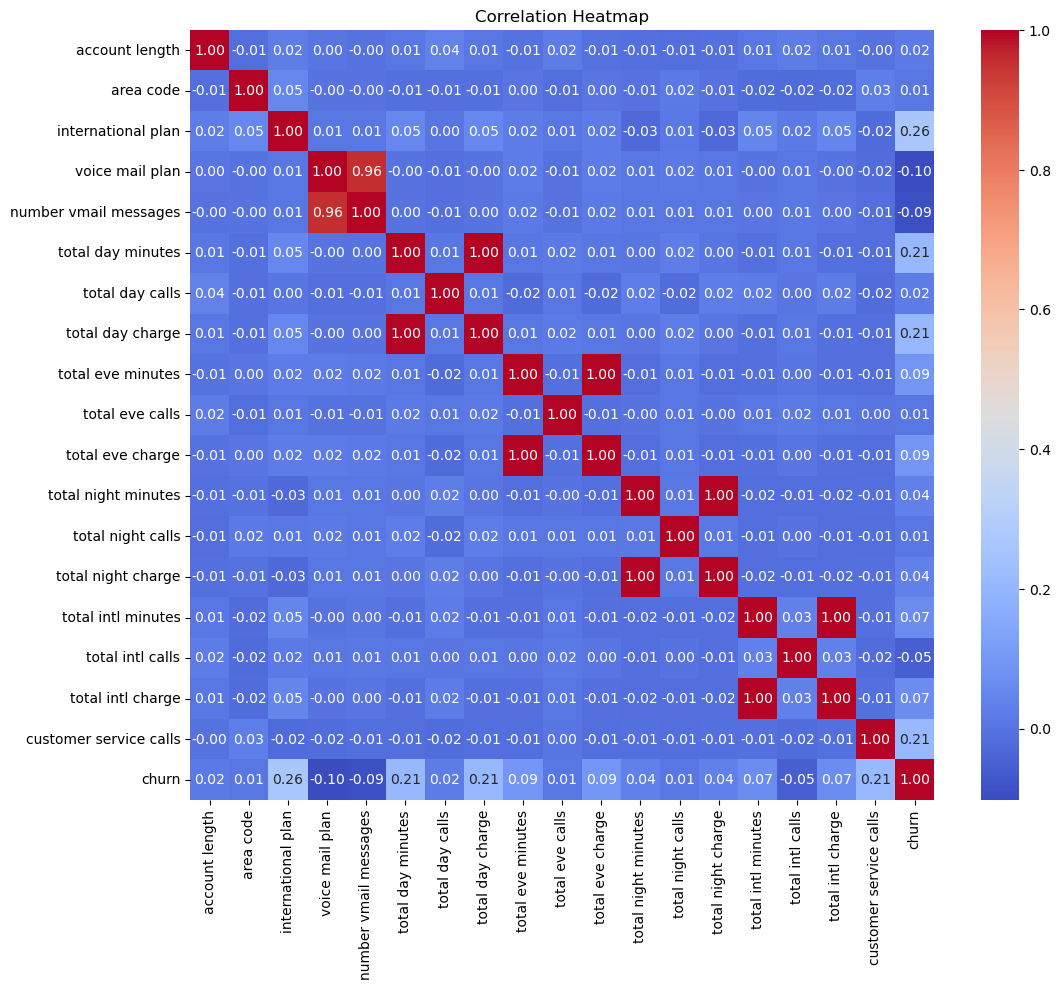

In [24]:
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- Certain features have a perfect correlation of 1, indicating a high correlation. As a result of the charges being directly correlated with the usage, which in this case is minutes, these features are linear. The following show multicollinearity:


  - Total int charge and total int minutes
  
  - Total night charge and total night minutes
  
  - Total eve charge and total eve minutes
  
   - Total day charge and total day minutes

In [25]:
def drop_multicollinearity(df, threshold=0.9):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()

    # Create a mask to identify highly correlated features
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Find the highly correlated features
    highly_correlated = corr_matrix.mask(mask).stack().sort_values(ascending=False)

    # Identify variables with correlation above the threshold
    correlated_vars = highly_correlated[highly_correlated > threshold].index.get_level_values(0)

    # Drop the highly correlated variables from the DataFrame
    df_dropped = df.drop(columns=correlated_vars)

    return df_dropped

# Apply the function to drop highly correlated features
df = drop_multicollinearity(df)

print("The reduced dataframe has {} columns.".format(df.shape[1]))


The reduced dataframe has 14 columns.


In [26]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
print(pd.Series(y_resampled).value_counts(normalize=True))

churn
0    0.5
1    0.5
Name: proportion, dtype: float64


## Modelling

#### Linear Regression Model
A classification technique used in machine learning is called logistic regression. When targeting a variable with two classes, it works well for binary classification tasks. The logistic regression model is the best fit for predicting the class of the target variable since the variable, churn, has two classes. When compared to other models, this one will serve as the baseline.

In [28]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Print sizes to verify split
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 2666
Testing set size: 667


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model with scaled data
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
# Make predictions on the test set
y_pred = logistic_regression.predict(X_test_scaled)

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8575712143928036
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.59      0.19      0.29       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



- Accuracy: The model correctly predicts around 85.76% of instances.

- Precision: The precision for non-churned customers (class 0) is relatively high at 0.87, indicating that when the model predicts a customer will not churn, it's correct 87% of the time. However, the precision for churned customers (class 1) is lower at 0.59, suggesting that when the model predicts churn, it's less reliable.

- Recall: The recall for class 0 is high at 0.98, indicating that the model correctly identifies most non-churned customers. However, the recall for class 1 is low at 0.19, indicating that the model misses many churned customers.

- F1-score: The F1-score provides a balance between precision and recall. The F1-score for class 0 is high at 0.92, while the F1-score for class 1 is lower at 0.29.

#### Random Forest Classifier

In [35]:
# Initialize and train the Random Forest Classifier with scaled data
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9415292353823088
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       566
           1       0.96      0.64      0.77       101

    accuracy                           0.94       667
   macro avg       0.95      0.82      0.87       667
weighted avg       0.94      0.94      0.94       667



- Accuracy: The model achieves a higher accuracy of 94.15%.

- Precision: Both precision scores for class 0 and class 1 are relatively high, indicating that the model performs well in both predicting non-churned and churned customers.

- Recall: The recall for class 0 is high at 0.99, indicating that the model correctly identifies almost all non-churned customers. The recall for class 1 is also higher at 0.64 compared to logistic regression, indicating that the model performs better in identifying churned customers.

- F1-score: The F1-scores for both classes are high, indicating a good balance between precision and recall for both non-churned and churned customers.

In [36]:
# Initialize the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [37]:
from sklearn.model_selection import GridSearchCV
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.9505247376311844
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.94      0.72      0.82       101

    accuracy                           0.95       667
   macro avg       0.94      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667

